# Scikit-Image Tutorial: Filters

#### Image filtering theory

Image filtering is one of the most basic operations in image processing and computer vision. It's found in basic operations like canny edge detection to complex machine learning algorithms like convolutional neural networks.       

It can be employed to remove noise, highlight features (interesting bits). It can be a step in preprocessing or a desired result.

For the purpose of simplicity, we will start with a simple 1D array.

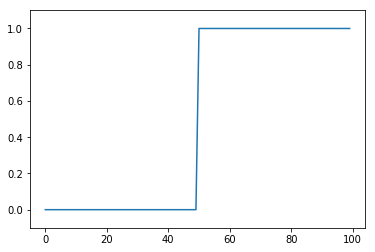

In [10]:
import numpy as np
from matplotlib import pyplot as plt

step_function = np.zeros(100)

#Lets add a step function
step_function[50:] = 1

#Now lets plot it
fig, ax = plt.subplots()
ax.plot(step_function)
ax.margins(y=0.1)

For those that aren't electrical engineers, this is a step function. Think of it as a transistor switching itself on at a given point, jumping from 0 to 1 instantaneously.

Lets say this is part of a binary file, it's been transmitted across the intenet and encountered some interference along the way. So...

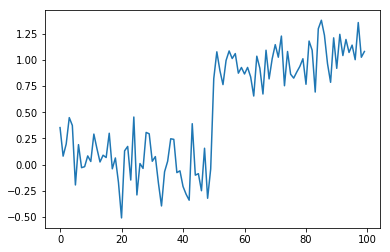

In [13]:
#Lets add some noise, we'll seed the numbers first so our diagrams all look the same
np.random.seed(0)

noisy_step_function = (step_function + np.random.normal(0, 0.2, step_function.shape))

fig, ax = plt.subplots()
ax.plot(noisy_step_function)

Here we see a rather noisy step function. The simplest way to reduce noise is to take an average of the neighboring values at each point.

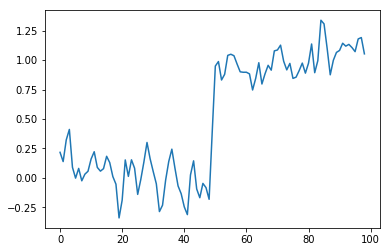

In [17]:
smooth_step_function = (noisy_step_function[:-1] + noisy_step_function[1:]) / 2.0
fig, ax = plt.subplots()
ax.plot(smooth_step_function)

So that that's looking a bit better, but what if we take 3 pixel values?

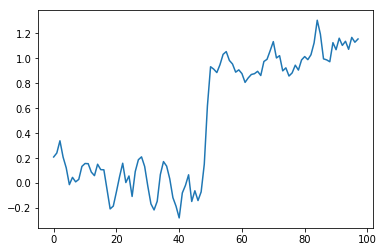

In [16]:
smoother_step_function = (noisy_step_function[:-2] + noisy_step_function[1:-1] + noisy_step_function[2:]) / 3
fig, ax = plt.subplots()
ax.plot(smoother_step_function)

Again, this is smoother, but as we take averages of more and more neighboring pixels, the expression above is going to get more and more complicated.

To mitigate this, we use something called a kernel, a kernel is just a fancier name for a filter. The action of applying a filter is called a convolution.

#### Exercise: In class I will demonstrate a kernal working, using a pen and paper, try and work out what the output will be.

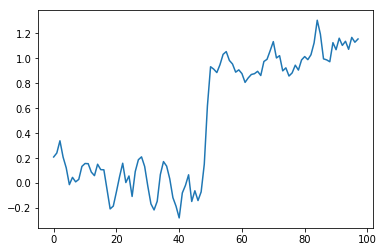

In [18]:
mean_kernel = np.full(3, 1/3)
filtered_step_function = np.convolve(noisy_step_function, mean_kernel, mode='valid')
fig, ax = plt.subplots()
ax.plot(filtered_step_function)

Notice how this result is exactly the same, exacept we've achieved this with less complicated code.  
What will happen if we try the same, but take an average of 11 values? 

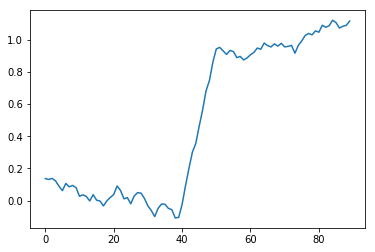

In [23]:
mean_kernel11 = np.full(11, 1/11)
filtered_step_function11 = np.convolve(noisy_step_function, mean_kernel11, mode='valid')
fig, ax = plt.subplots()
ax.plot(filtered_step_function11)

That's much smoother, and we only changed 2 characters in our code!

There is a much "better", way to smooth out noise. Introducing the guassian function. 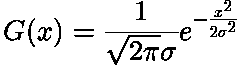



I won't go into the maths of this for the sake of our collective sanity. Lets just plot this.

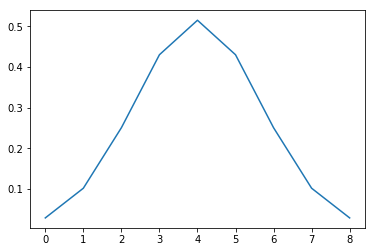

In [45]:
k = 1/ np.sqrt(2 * np.pi * 0.6) * np.exp(-(np.arange(9)-4)**2/2*(0.6**2))
fig, ax = plt.subplots()
ax.plot(k)

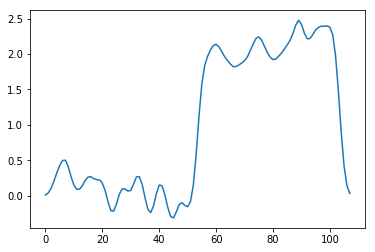

In [46]:
guassian_noisy_step_function = np.convolve(k, noisy_step_function, mode='full')
fig, ax = plt.subplots()
ax.plot(guassian_noisy_step_function)

Now this looks really smooth. However forget the math, think of this as just a smoothing function.  

And luckily Scikit-Image comes with a guassian filter no assembly required!

#### Difference filters

Now lets consider our old step function. What would happen if I applied a convolution with a filter like `[1, 0, -1]`?
Lets have a look.

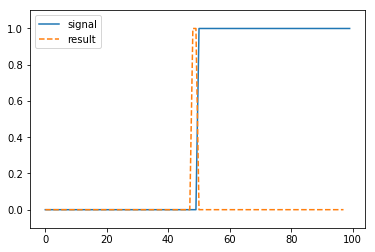

In [62]:
result = np.convolve(step_function, np.array([1,0,-1]), mode='valid')
fig, ax = plt.subplots()
ax.plot(step_function, label='signal')
ax.plot(result, linestyle='dashed', label='result')
ax.legend(loc='upper left')
ax.margins(y=0.1)

Here we see a pulse of sorts where there is a change in intesity for the values. This can be thought of as a difference filter.

What happens however if we use a noisy signal?

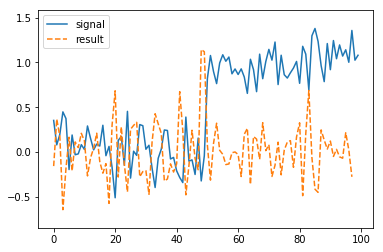

In [30]:
result = np.convolve(noisy_step_function, np.array([1,0,-1]), mode='valid')
fig, ax = plt.subplots()
ax.plot(noisy_step_function, label='signal')
ax.plot(result, linestyle='dashed', label='result')
ax.legend(loc='upper left')
ax.margins(y=0.1)

#### Filters with 2D images

So we've looked at a smoothing and a a filtering function in 1D. Lets get cracking with some pictures.  

Lets Start by taking an image and smotthing it out by aapplying a guassian filter.

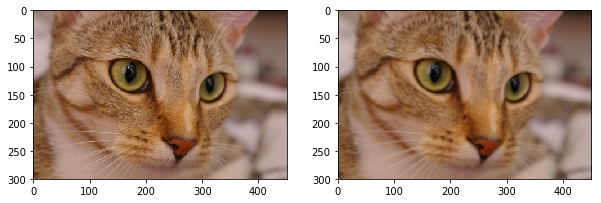

In [65]:
from skimage import data, io, filters
cat = data.chelsea()
guassian_cat = filters.gaussian(cat, 1)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,10))
ax0.imshow(cat)
ax1.imshow(guassian_cat)





What do we notice about the filtered cat on the right? (Apologies for any people with bad eyesight, I will make this clearer)

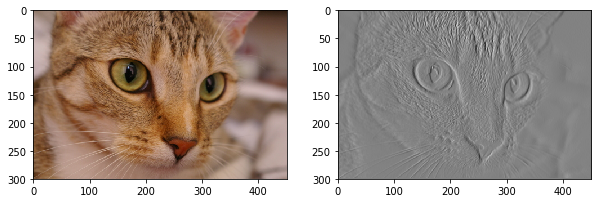

In [79]:
gray_cat = rgb2gray(cat)
difference_filtered_cat = filters.sobel_v(gray_cat)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,10))
ax0.imshow(cat)
ax1.imshow(difference_filtered_cat, cmap="gray")